 Data Loading and Exploration

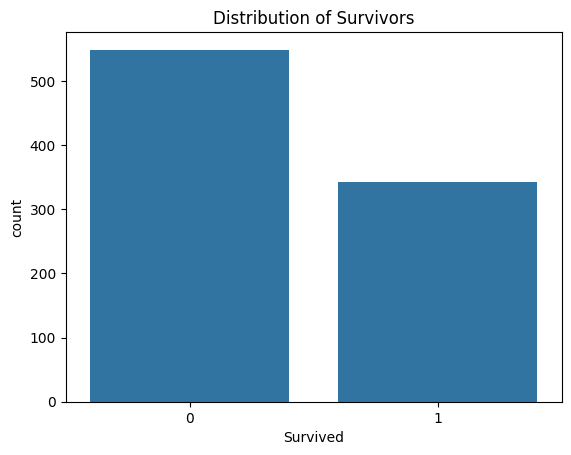

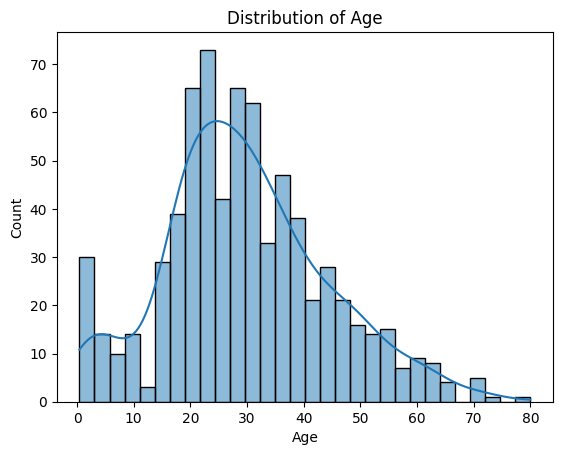

First few data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Missing Values
PassengerId      0
Survived         0
Pclass      

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Load data
df = pd.read_csv('Titanic-Dataset copy 2.csv')

# Exploratory Data Analysis (EDA)
# Example visualizations
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survivors')
plt.show()

sns.histplot(x='Age', data=df, bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Summary statistics
print(df.describe())

# Checking for missing values
print("\nMissing Values")
print("================")
print(df.isnull().sum())


Distribution of Survival

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


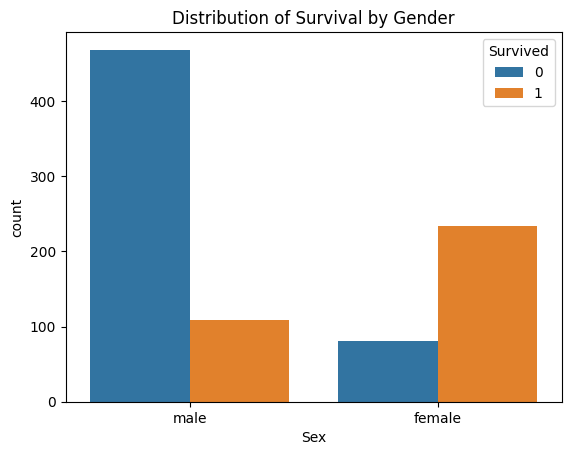

C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


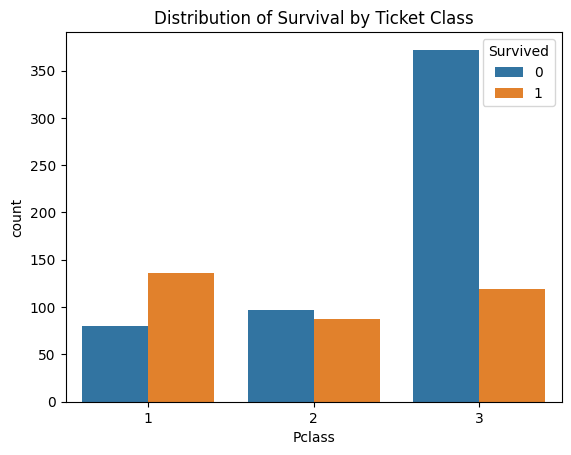

C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


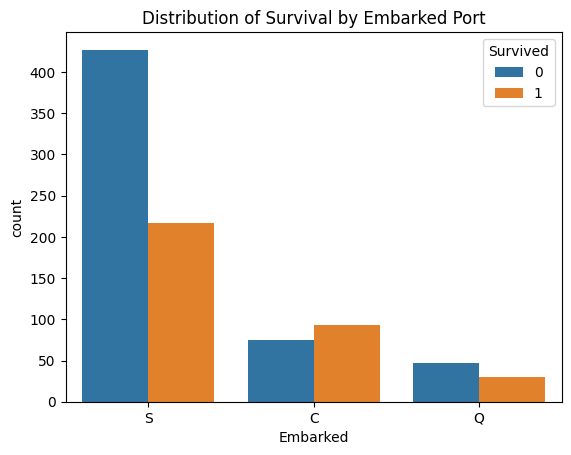

In [21]:
# Analyze the distribution of survival by gender
print(df.groupby('Sex')['Survived'].value_counts(normalize=True))

# Visualize the distribution
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Distribution of Survival by Gender')
plt.show()

# Analyze the distribution of survival by other features if necessary
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Distribution of Survival by Ticket Class')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Distribution of Survival by Embarked Port')
plt.show()

Data Preprocessing and Feature Engineering

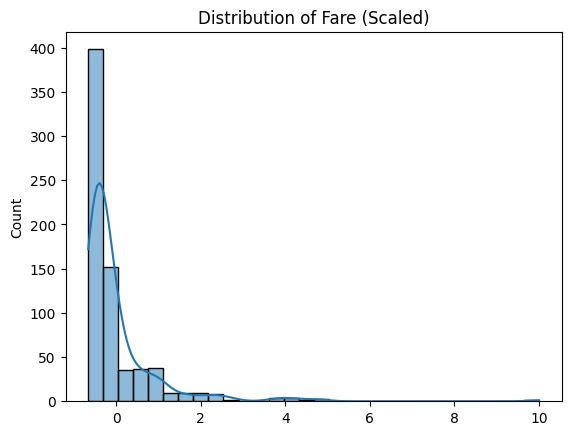

In [2]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X = df[features]
y = df[target]

# Preprocessing pipeline
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the data including categorical encoding
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Example: Visualize distribution of Fare after scaling
sns.histplot(X_train_preprocessed[:, numeric_features.index('Fare')], bins=30, kde=True)
plt.title('Distribution of Fare (Scaled)')
plt.show()


Handling Class Imbalance with Resampling

In [3]:
# Resampling using SMOTE and EditedNearestNeighbours
smote = SMOTE(sampling_strategy='minority', random_state=42)
enn = EditedNearestNeighbours(sampling_strategy='all', n_neighbors=3)
smote_enn = SMOTEENN(smote=smote, enn=enn)

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_preprocessed, y_train)


Model Training and Evaluation

In [25]:
# Define the classifier and pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameters for tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
best_accuracy = grid_search.best_score_
print("Best Cross-validation Accuracy:", best_accuracy)

# Evaluate on the test set
y_pred = grid_search.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Cross-validation Accuracy: 0.9828571428571429
Accuracy: 0.7821229050279329
Confusion Matrix:
[[86 24]
 [15 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       110
           1       0.69      0.78      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



                 precision    recall  f1-score   support

   Actual Value       0.85      0.78      0.82       110
Predicted Value       0.69      0.78      0.73        69

       accuracy                           0.78       179
      macro avg       0.77      0.78      0.77       179
   weighted avg       0.79      0.78      0.78       179



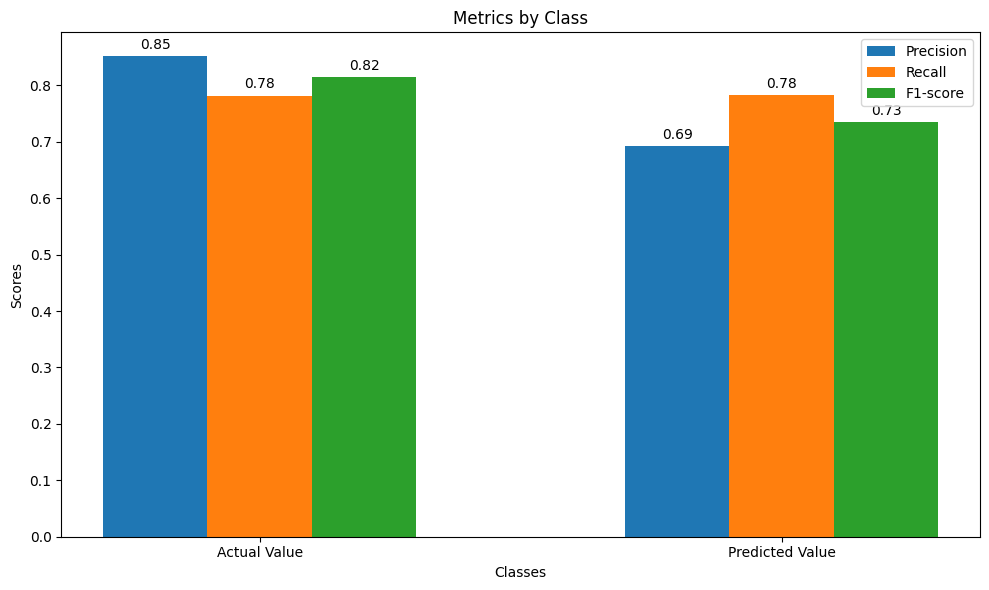

In [38]:
report = classification_report(y_test, y_pred, target_names=['Actual Value', 'Predicted Value'])
print(report)

# Alternatively, get report in dictionary format
report_dict = classification_report(y_test, y_pred, target_names=['Actual Value', 'Predicted Value'], output_dict=True)

# Extract metrics for each class
classes = ['Actual Value', 'Predicted Value']  # Update with your actual class labels
precision = [report_dict[cls]['precision'] for cls in classes]
recall = [report_dict[cls]['recall'] for cls in classes]
f1_score = [report_dict[cls]['f1-score'] for cls in classes]
support = [report_dict[cls]['support'] for cls in classes]

# Plotting
x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


Confusion Matrix

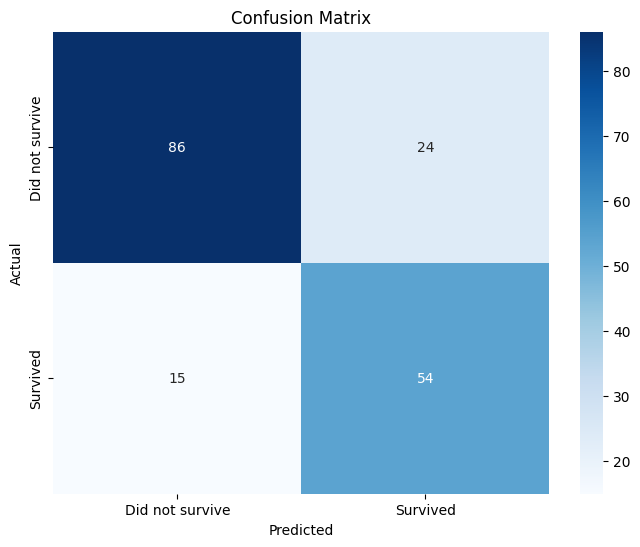

In [27]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did not survive', 'Survived'], 
            yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Saving the Model and Preprocessor

In [28]:
import joblib

# Save the best model and preprocessor
joblib.dump({'model': grid_search.best_estimator_, 'preprocessor': preprocessor}, 'balanced_titanic_model.pkl')
print("Model has been saved to: balanced_titanic_model.pkl")


Model has been saved to: balanced_titanic_model.pkl


Prediction and Example Usage

In [41]:
# Example of predicting survival for a new passenger
def predict_survival(passenger_data):
    df_passenger = pd.DataFrame([passenger_data])
    X_passenger = preprocessor.transform(df_passenger)
    prediction = grid_search.best_estimator_.predict(X_passenger)
    return 'Survived' if prediction[0] == 1 else 'Did not survive'

# Example passenger data
sample_passenger = {
    'Pclass': 1,
    'Sex': 'male',
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}

result = predict_survival(sample_passenger)
print(f'The sample passenger would have: {result}')


The sample passenger would have: Did not survive
